# Replicate: Nvidia AI IOT NanoSAM

In [1]:
# Debud Support

# Check your conda env GLIBCXX versions
# strings /home/copter/miniconda3/envs/nanosam_arm64/lib/python3.10/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6 | grep GLIBCXX

# trt2torch is apparently an issue and is obsolete for trt --version=10.3.0 
# additionally `pip install pycuda`

In [2]:
# from nanosam.utils.predictor import Predictor
import PIL
import numpy as np
import PIL.Image as PIL
import matplotlib.pyplot as plt

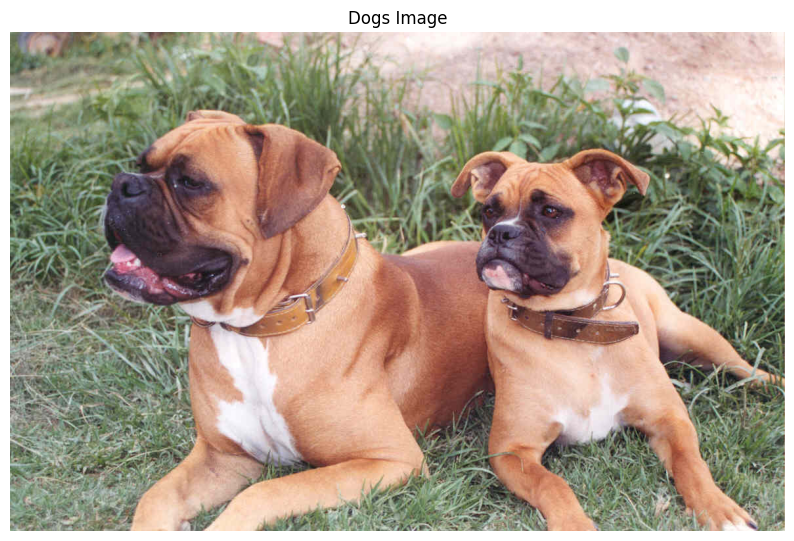

In [3]:

# Load the image
image = PIL.open("/home/copter/jetson_benchmark/images/dogs.jpg")

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.title("Dogs Image")
plt.show()

In [4]:
# In your Jupyter notebook, run this first
import torch
import gc

# Clear any existing CUDA memory
torch.cuda.empty_cache()
gc.collect()

if torch.cuda.is_available():
    print(f"torch.cuda.is_available(): {torch.cuda.is_available()}")
    print(f"GPU memory allocated: {torch.cuda.memory_allocated()/1024**2:.2f} MB")

# Check available memory
print(f"GPU memory allocated: {torch.cuda.memory_allocated()/1024**2:.2f} MB")
print(f"GPU memory cached: {torch.cuda.memory_reserved()/1024**2:.2f} MB")

torch.cuda.is_available(): True
GPU memory allocated: 0.00 MB
GPU memory allocated: 0.00 MB
GPU memory cached: 0.00 MB


In [5]:
# Test Basic Cuda Mem Function

import torch
import gc

# Test basic CUDA operations
print("Testing CUDA operations...")
test_tensor = torch.randn(100, 100).cuda()
print(f"Created test tensor on GPU: {test_tensor.device}")
print(f"GPU memory after test tensor: {torch.cuda.memory_allocated()/1024**2:.2f} MB")

# Clean up
del test_tensor
torch.cuda.empty_cache()
print(f"GPU memory after cleanup: {torch.cuda.memory_allocated()/1024**2:.2f} MB")

import psutil
import os

# Check system memory
memory = psutil.virtual_memory()
print(f"Total RAM: {memory.total/1024**3:.1f} GB")
print(f"Available RAM: {memory.available/1024**3:.1f} GB")
print(f"Used RAM: {memory.used/1024**3:.1f} GB ({memory.percent:.1f}%)")

# Check current process memory
process = psutil.Process(os.getpid())
print(f"Jupyter process memory: {process.memory_info().rss/1024**2:.1f} MB")

Testing CUDA operations...
Created test tensor on GPU: cuda:0
GPU memory after test tensor: 0.04 MB
GPU memory after cleanup: 0.00 MB
Total RAM: 61.4 GB
Available RAM: 43.0 GB
Used RAM: 17.6 GB (29.9%)
Jupyter process memory: 477.6 MB


In [ ]:
import torch
# from nanosam.utils.predictor import Predictor
from nanosam.utils.predictor_no_trt2torch import Predictor
import PIL.Image

print("Loading predictor (bypassing pycuda)...")
try:
    predictor = Predictor(
        image_encoder_engine="/home/copter/engine_models/nvidia_ai_iot_resnet18_image_encoder_fp16.engine",
        mask_decoder_engine="/home/copter/engine_models/nvidia_ai_iot_mobile_sam_mask_decoder_fp32.engine"
    )
    print("✅ Predictor loaded successfully!")
    
    # Test with your image
    image = PIL.Image.open("/home/copter/jetson_benchmark/images/dogs.jpg")
    print(f"Image loaded: {image.size}")
    
    predictor.set_image(image)
    print("✅ Image set successfully!")
    
    # Check memory usage
    print(f"System RAM used: {psutil.virtual_memory().used/1024**3:.1f} GB")
    print(f"GPU memory: {torch.cuda.memory_allocated()/1024**2:.2f} MB")
    
except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()

Loading predictor (bypassing pycuda)...
Loading image encoder...
Loading mask decoder...
Predictor loaded successfully!
✅ Predictor loaded successfully!
Image loaded: (1180, 760)
❌ Error: empty() received an invalid combination of arguments - got (tuple, device=str, dtype=torch.dtype), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, torch.memory_format memory_format = None, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)



Traceback (most recent call last):
  File "/tmp/ipykernel_133266/651802221.py", line 18, in <module>
    predictor.set_image(image)
  File "/home/copter/nanosam/nanosam/utils/predictor_no_trt2torch.py", line 237, in set_image
    self.features = self.image_encoder_engine(image=self.image_tensor)
  File "/home/copter/nanosam/nanosam/utils/predictor_no_trt2torch.py", line 88, in __call__
    output_tensors[name] = torch.empty(shape, dtype=dtype, device='cuda')
TypeError: empty() received an invalid combination of arguments - got (tuple, device=str, dtype=torch.dtype), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, torch.memory_format memory_format = None, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_m

In [ ]:
predictor = Predictor(
    image_encoder_engine="/home/copter/engine_models/nvidia_ai_iot_resnet18_image_encoder_fp32.engine",  
    mask_decoder_engine="/home/copter/engine_models/nvidia_ai_iot_mobile_sam_mask_decoder_fp32.engine"
)

predictor.set_image(image)

mask, _, _ = predictor.predict(np.array([[x, y]]), np.array([1]))

Loading image encoder...
Loading mask decoder...
Predictor loaded successfully!


TypeError: empty() received an invalid combination of arguments - got (tuple, device=str, dtype=torch.dtype), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, torch.memory_format memory_format = None, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
